Imports..

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

Class for callback and function for nn model

In [0]:
class callback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    loss = logs.get('loss')
    if(loss < 0.3):
      print("\n\nStooping training {} < 0.3\n".format(loss))
      self.model.stop_training = True


def createModel():
  return keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28,1)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
  

Now we will load the data..

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = np.array(x_train / 255.0)
x_test = np.array(x_test / 255.0)
test_data= (x_test, y_test)

4423680/4422102 [==============================] - 0s 0us/step


And Finally train the nn

In [4]:
model = createModel()
model.summary()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
print(x_train.shape)
print(y_train.shape)
history = model.fit(x_train,y_train,epochs=5)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
(60000, 28, 28)
(60000,)
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4957 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================]

In [5]:
model.save(filepath="model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


Model accuracy(

  FLATTEN(28,28),DENSE(1024,relu),DENSE(10,softmax)

  Optimizer-> ADAM, Loss Function sparse categorical cross entropy

):

				                  ACCURACY				 LOSS
128 neurons 5 epochs | 0.8923-> 0.8652 | 0.2943->0.3391 

128 neurons 10 epochs | 0.9101->0.8801| 0.2384->0.3403 

128 neurons 20 epochs | 0.933->0.8879 | 0.1787->0.3727 

1024 neurons 5 epochs | 0.8964->0.8743 | 0.2798->0.3371 

1024 neurons 10 epochs | 0.9176->0.8873 | 0.2212->0.3458 

1024 neurons 20 epochs | 0.941->0.8910 | 0.1553->0.3645 





Text(0.5, 0, 'Camisa')

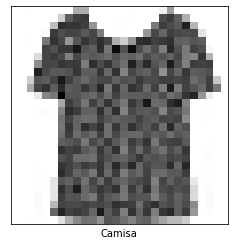

In [6]:
class_names = ['T-shirt/top', 'Calças', 'Pullover', 'Vestido', 'Casaco',
               'Sandálias', 'Camisa', 'Ténis', 'Mala', 'Bota']

model_imported = tf.keras.models.load_model("model")
# loss,accuracy = model_imported.evaluate(x_test,y_test)
# print(accuracy)


index_to_avaliate = 1000
values = model_imported.predict(np.array([x_test[index_to_avaliate]]))
values = values.tolist()
plt.imshow(x_test[index_to_avaliate], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(class_names[max(values).index(max(max(values)))]) #fashion_mnist
#plt.xlabel(max(values).index(max(max(values)))) #mnist
